In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [5]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [13]:
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
       
        if self.distance_metric == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'manhattan':
            distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError('Invalid distance metric')

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [9]:
knn_euclidean = KNN(k=3, distance_metric='euclidean')
knn_manhattan = KNN(k=3, distance_metric='manhattan')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f'Accuracy (Euclidean): {accuracy_euclidean:.4f}')
print(f'Accuracy (Manhattan): {accuracy_manhattan:.4f}')


Accuracy (Euclidean): 1.0000
Accuracy (Manhattan): 1.0000


In [10]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Sklearn Accuracy: {accuracy_sklearn:.4f}')

Sklearn Accuracy: 1.0000


In [11]:
# 2nd Question
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = iris.data[:, 0].reshape(-1, 1)  
y = iris.data[:, 1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
class KNNRegression:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_targets = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_targets)

In [21]:
knn_regression = KNNRegression(k=1)
knn_regression.fit(X_train, y_train)

y_pred = knn_regression.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'K-NN Regression (K = 1), RMSE: {rmse:.4f}')

sklearn_knn = KNeighborsRegressor(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print(f'Sklearn KNeighborsRegressor (K = 1), RMSE: {rmse_sklearn:.4f}')

K-NN Regression (K = 1), RMSE: 0.5425
Sklearn KNeighborsRegressor (K = 1), RMSE: 0.3752


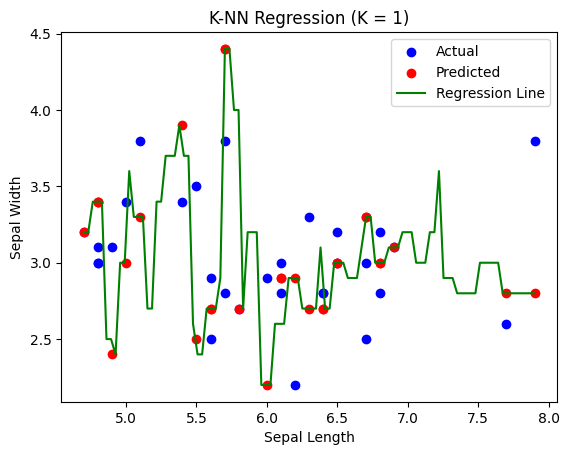

In [23]:
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.scatter(X_test, y_pred, color='r', label='Predicted')


X_line = np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1)
y_line = knn_regression.predict(X_line)
plt.plot(X_line, y_line, color='g', label='Regression Line')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-NN Regression (K = 1)')
plt.legend()
plt.show()

In [19]:
knn_regression = KNNRegression(k=2)
knn_regression.fit(X_train, y_train)

y_pred = knn_regression.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'K-NN Regression (K = 2), RMSE: {rmse:.4f}')

sklearn_knn = KNeighborsRegressor(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print(f'Sklearn KNeighborsRegressor (K = 2), RMSE: {rmse_sklearn:.4f}')

K-NN Regression (K = 2), RMSE: 0.4965
Sklearn KNeighborsRegressor (K = 2), RMSE: 0.3752


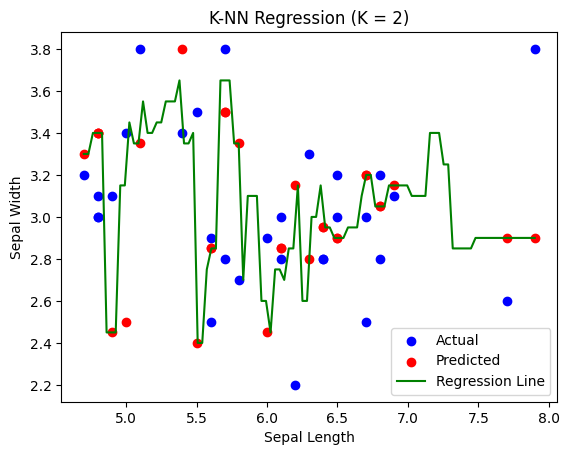

In [20]:
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.scatter(X_test, y_pred, color='r', label='Predicted')

X_line = np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1)
y_line = knn_regression.predict(X_line)
plt.plot(X_line, y_line, color='g', label='Regression Line')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-NN Regression (K = 2)')
plt.legend()
plt.show()

In [16]:
knn_regression = KNNRegression(k=3)
knn_regression.fit(X_train, y_train)

y_pred = knn_regression.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'K-NN Regression (K = 3), RMSE: {rmse:.4f}')

sklearn_knn = KNeighborsRegressor(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
print(f'Sklearn KNeighborsRegressor (K = 3), RMSE: {rmse_sklearn:.4f}')


K-NN Regression (K = 3), RMSE: 0.4414
Sklearn KNeighborsRegressor (K = 3), RMSE: 0.3752


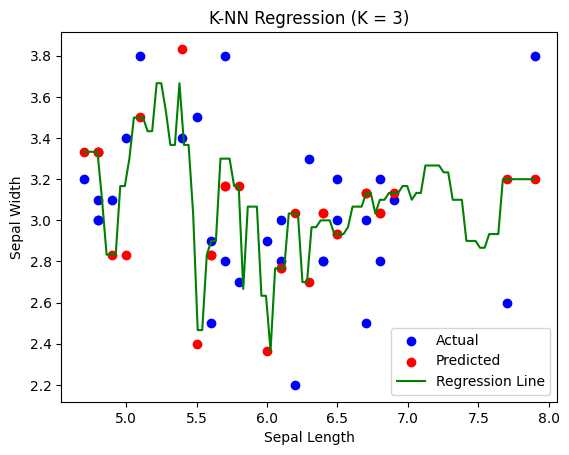

In [17]:
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.scatter(X_test, y_pred, color='r', label='Predicted')


X_line = np.linspace(np.min(X_test), np.max(X_test), 100).reshape(-1, 1)
y_line = knn_regression.predict(X_line)
plt.plot(X_line, y_line, color='g', label='Regression Line')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-NN Regression (K = 3)')
plt.legend()
plt.show()